    Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, 
    że przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie 
    nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, 
    do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. 
    Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

    Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
    Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
    Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania 
    (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.
    Do wykonania powyższego zadania wykorzystaj biblioteki NumPy, NumPy-financial oraz Matplotlib. 
    Odpowiedzi na pytania umieść w Notebooku (jeśli korzystasz) lub w komentarzach w kodzie.

#### Obliczanie przyszłej wartości mieszkania

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import numpy_financial as npf

In [7]:
rate = 0.05
years = 5
pv = 120000
frequency = 12
rate /= frequency
nper = years * frequency

In [8]:
periods = np.arange(1, nper+1, dtype=int)

In [17]:
future_value = -np.around(npf.fv(rate, periods, 0, pv), 2)
future_value

array([120500.  , 121002.08, 121506.26, 122012.53, 122520.92, 123031.42,
       123544.06, 124058.82, 124575.73, 125094.8 , 125616.03, 126139.43,
       126665.01, 127192.78, 127722.75, 128254.93, 128789.32, 129325.95,
       129864.8 , 130405.91, 130949.26, 131494.89, 132042.78, 132592.96,
       133145.43, 133700.2 , 134257.29, 134816.69, 135378.43, 135942.51,
       136508.93, 137077.72, 137648.88, 138222.41, 138798.34, 139376.67,
       139957.4 , 140540.56, 141126.15, 141714.17, 142304.65, 142897.58,
       143492.99, 144090.88, 144691.26, 145294.14, 145899.53, 146507.44,
       147117.89, 147730.88, 148346.43, 148964.54, 149585.22, 150208.49,
       150834.36, 151462.84, 152093.93, 152727.66, 153364.02, 154003.04])

### Cena mieszkania przy założeniu obecnej ich ceny 120 000 PLN oraz rosnącej ich ceny 5% p.a po 5 latach będzie wynosić 154 003 PLN

#### Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat

In [21]:
rate2 = 0.12
years2 = 5
fv = 154003
frequency2 = 12
rate2 /= frequency2

In [22]:
nper = years * frequency2

In [47]:
future_value_deposit1 = -np.around(npf.ppmt(rate2, periods, nper, 0, fv, 0), 2)
future_value_deposit1

array([1885.68, 1904.54, 1923.58, 1942.82, 1962.25, 1981.87, 2001.69,
       2021.71, 2041.92, 2062.34, 2082.97, 2103.8 , 2124.83, 2146.08,
       2167.54, 2189.22, 2211.11, 2233.22, 2255.55, 2278.11, 2300.89,
       2323.9 , 2347.14, 2370.61, 2394.32, 2418.26, 2442.44, 2466.87,
       2491.53, 2516.45, 2541.61, 2567.03, 2592.7 , 2618.63, 2644.81,
       2671.26, 2697.97, 2724.95, 2752.2 , 2779.73, 2807.52, 2835.6 ,
       2863.95, 2892.59, 2921.52, 2950.73, 2980.24, 3010.04, 3040.15,
       3070.55, 3101.25, 3132.26, 3163.59, 3195.22, 3227.18, 3259.45,
       3292.04, 3324.96, 3358.21, 3391.79])

### powyżej wyliczona kwota depozytu wraz z odsetkami 12% z kapitalizacją miesięczną

In [62]:
future_value_deposit1.sum()

154002.97

In [56]:
np_future_value_deposit1 = np.cumsum(future_value_deposit1)
np_future_value_deposit1

array([  1885.68,   3790.22,   5713.8 ,   7656.62,   9618.87,  11600.74,
        13602.43,  15624.14,  17666.06,  19728.4 ,  21811.37,  23915.17,
        26040.  ,  28186.08,  30353.62,  32542.84,  34753.95,  36987.17,
        39242.72,  41520.83,  43821.72,  46145.62,  48492.76,  50863.37,
        53257.69,  55675.95,  58118.39,  60585.26,  63076.79,  65593.24,
        68134.85,  70701.88,  73294.58,  75913.21,  78558.02,  81229.28,
        83927.25,  86652.2 ,  89404.4 ,  92184.13,  94991.65,  97827.25,
       100691.2 , 103583.79, 106505.31, 109456.04, 112436.28, 115446.32,
       118486.47, 121557.02, 124658.27, 127790.53, 130954.12, 134149.34,
       137376.52, 140635.97, 143928.01, 147252.97, 150611.18, 154002.97])

### miesiączna kwota depozyty w okresie 5 lat wynosi:

In [36]:
future_value_deposit = -np.around(npf.pmt(rate2, nper, 0, fv), 2)
future_value_deposit

1885.68

In [31]:
np.set_printoptions(suppress=True)

principal1= np.around(np.zeros(nper)+(fv/nper),2)
principal1

array([2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72,
       2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72,
       2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72,
       2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72,
       2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72,
       2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72,
       2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72,
       2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72, 2566.72,
       2566.72, 2566.72, 2566.72, 2566.72])

In [49]:
principal1.sum()

154003.19999999998

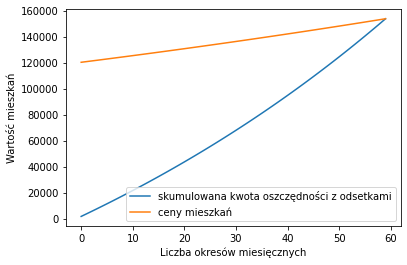

In [61]:
plt.plot(np_future_value_deposit1,label='skumulowana kwota oszczędności z odsetkami')
plt.plot(future_value,label='ceny mieszkań')
plt.legend()
plt.xlabel('Liczba okresów miesięcznych')
plt.ylabel('Wartość mieszkań')
plt.show()

### Aby zaoszczędzić na mieszkanie, które obecnie kosztuje 120 000 PLN przy wzroście cen mieszkań 5% p.a należy wpłacać do banku miesięcznie kwotę 1885,68 PLN przy założeniu oprocentowanie depozytu 12% p.a oraz kapitalizacji miesięcznej aby uzbierać kwotę równą wartości mieszkania za 5 lat tj. 154 003PLN